In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
pip install kaggle


In [12]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs


 99% 733M/740M [00:08<00:00, 148MB/s]
100% 740M/740M [00:08<00:00, 95.5MB/s]


In [13]:
import os
print(os.getcwd())


/content


In [15]:
import zipfile
import os

# Get the current working directory
current_dir = os.getcwd()

# Join the current directory with the desired extraction path
extraction_path = os.path.join(current_dir, 'disease')

# Create the directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the files
with zipfile.ZipFile('disease.zip', 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [38]:
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['brown blight', 'white spot', 'bird eye spot', 'Anthracnose', 'red leaf spot', 'healthy', 'algal leaf', 'gray light']


In [39]:
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                     validation_split=val_split,
                                                     subset="validation",
                                                     seed=123,
                                                     image_size=(img_height, img_width),
                                                     batch_size=val_batch
                                                    )


Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [22]:
import pathlib


In [23]:
dataset_path = "/content/disease/tea sickness dataset"
dataset_dir = pathlib.Path(dataset_path)

In [24]:
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['brown blight', 'white spot', 'bird eye spot', 'Anthracnose', 'red leaf spot', 'healthy', 'algal leaf', 'gray light']


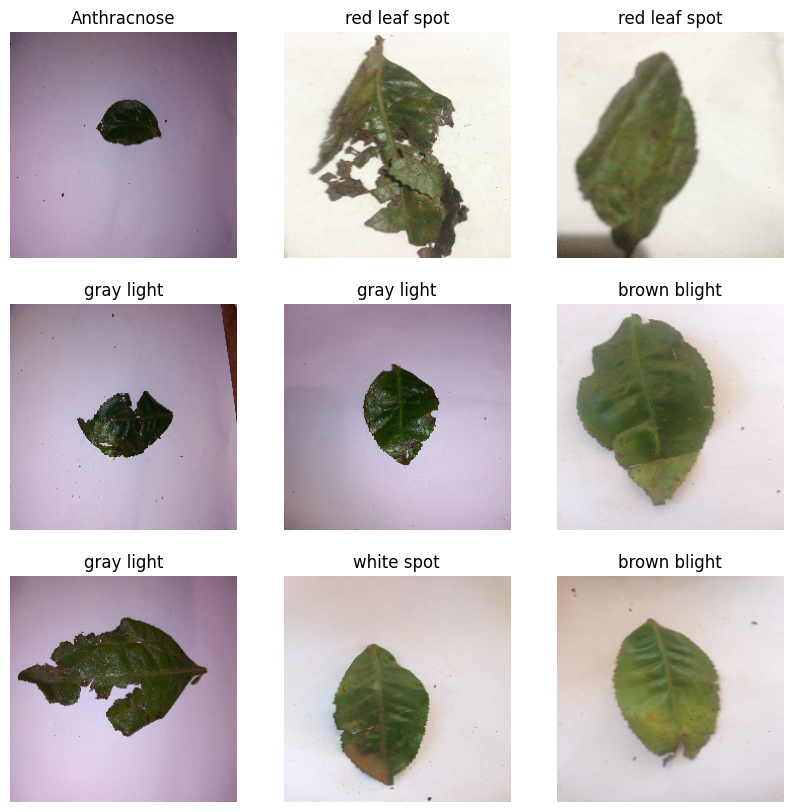

In [43]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [44]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib
## Data augmentation layers to increase data variation for training
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [82]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [83]:
base_learning_rate = 0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [91]:
epochs=600
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=0
)

Predictions:
 [7 7 0 7 2 7 2 1 1 4 2 3 7 6 0 1 0 3 3 4 3 0 6 3 7 4 7 1 4 0 7 5 3 0 6 4 3
 1 4 4 7 7 6 4 0 4 6 3 1 1 6 0 3 4 4 3 7 1 5 0 6 4 0 4 1 6 4 6 7 5 3 7 3 0
 2 7 1 3 2 2 4 6 6 0 0 1 1 4 7 0 0 4 5 3 2 6 4 7 7 7 2 6 0 7 4 1 7 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 3 0 4 7 3 4]
Labels:
 [3 7 2 7 0 7 2 1 1 4 0 7 7 6 0 1 2 3 3 4 3 0 6 3 7 4 1 1 0 4 7 5 3 0 6 4 3
 7 4 4 7 7 6 2 0 4 6 3 1 3 6 2 7 4 4 3 7 1 5 0 6 4 0 4 1 6 4 6 3 5 3 7 3 2
 2 7 1 3 2 0 4 6 6 0 0 1 1 4 7 0 0 4 5 3 2 6 4 7 7 3 2 6 0 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 3 0 4 7 3 0]

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.86      0.92      0.89        13
           2       0.67      0.55      0.60        11
           3       0.90      0.78      0.84        23
           4       0.86      0.95      0.90        20
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        15
           7       0.

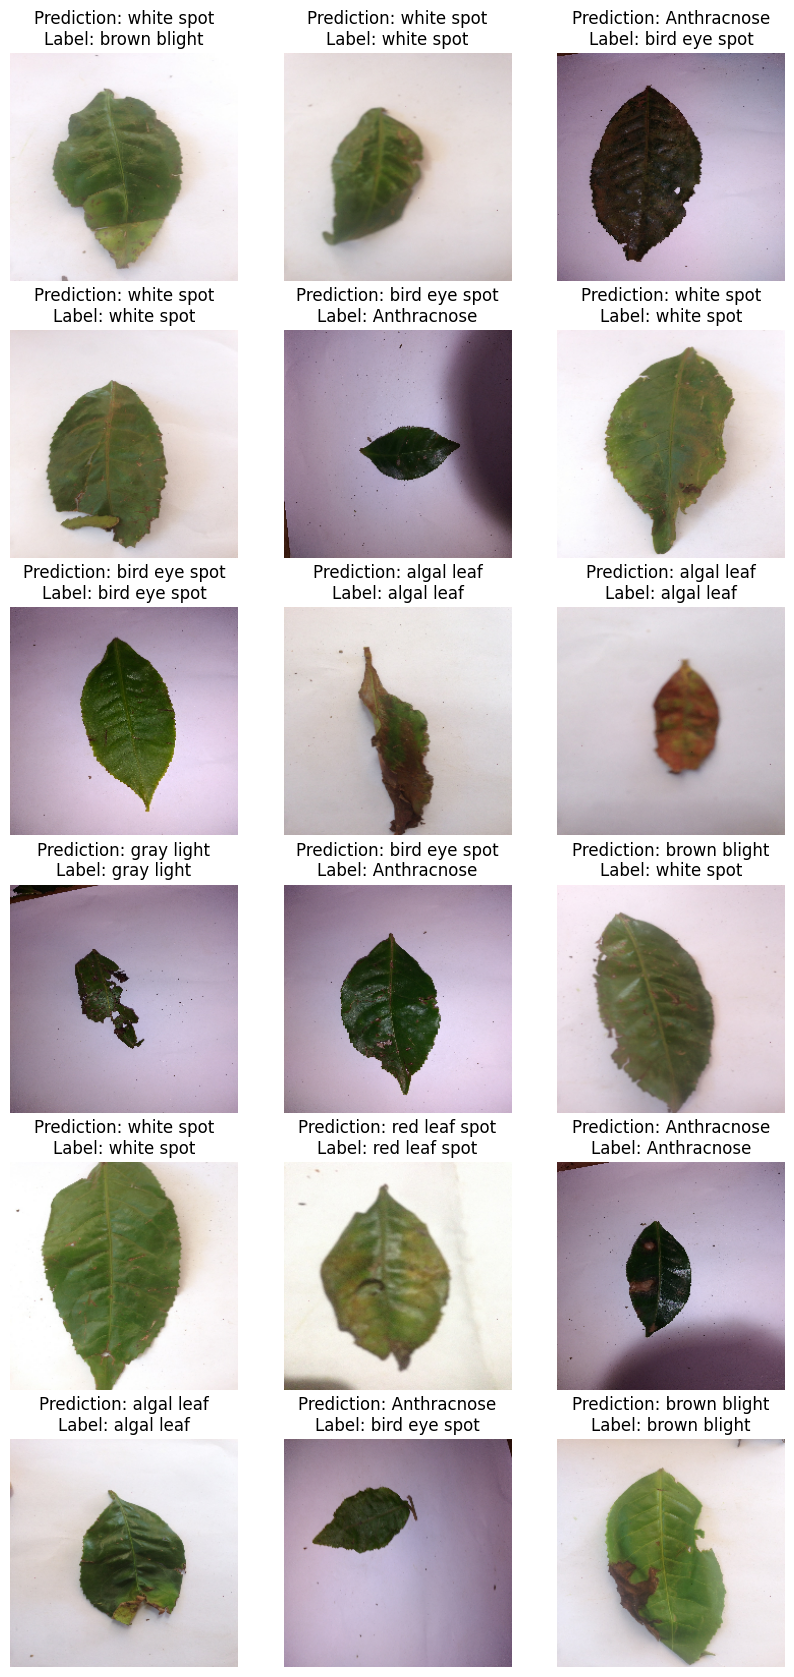

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

# Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

class_predictions = []
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)

class_predictions = np.array(class_predictions)
print('Predictions:\n', class_predictions)
print('Labels:\n', label_batch)
print()
print(classification_report(label_batch, class_predictions))

plt.figure(figsize=(10, 21))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction: "+class_names[class_predictions[i]]+"\nLabel: "+class_names[label_batch[i]])
    plt.axis("off")

1/1 [==============================] - 0s 52ms/step


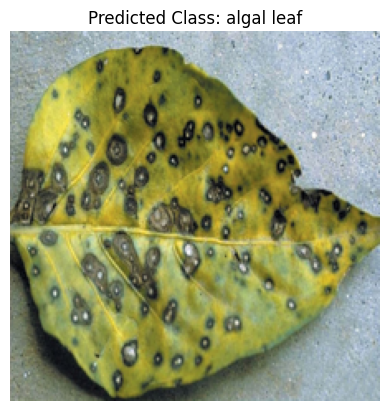

In [115]:
from PIL import Image
import numpy as np

# Load and preprocess the external image
external_image_path = '/content/ttty.jpeg'
external_image = Image.open(external_image_path).resize((224, 224))

# Convert the image to a NumPy array
external_image_array = np.array(external_image)
external_image_array = np.expand_dims(external_image_array, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(external_image_array)

# Convert predicted probabilities to class label
predicted_class = np.argmax(predictions[0])

# Display the external image with the predicted class
plt.imshow(external_image)
plt.title(f"Predicted Class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()
